# Análisis de datos HAR
Este notebook contiene ejercicios resueltos, interpretación adaptada a los datos reales, gráficos adicionales y comentarios explicativos.

## Importar las librerías necesarias y cargar los datos en dataframes

🔹 **Qué hacer:**  
- Importa las librerías básicas necesarias para el análisis de datos 
- Carga los siguientes archivos CSV en diferentes DataFrames:
  - `Phones_accelerometer.csv`
  - `Phones_gyroscope.csv`
  - `Watch_accelerometer.csv`
  - `Watch_gyroscope.csv`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

main_path= r'data/Activity recognition exp/'

# Carga de datos en csv
phones_accelerometer= pd.read_csv(os.path.join(main_path,"Phones_accelerometer.csv"))
phones_gyroscope= pd.read_csv(os.path.join(main_path,"Phones_gyroscope.csv"))
watch_accelerometer= pd.read_csv(os.path.join(main_path,"Watch_accelerometer.csv"))
watch_gyroscope= pd.read_csv(os.path.join(main_path,"Watch_gyroscope.csv"))

## Ejercicio 1: Cargar y explorar los datos del acelerómetro de los teléfonos

**Trabajaremos inicialmente con el acelerómetro del teléfono (`df_subset_ph_acc`).**


🔹 **Qué hacer:** 
- Mostrar las primeras 5 filas.
- Hacer un gráfico de barras que muestre la distribucion de muestras por actividad

🔹 **¿Por qué es importante?:** Entender la estructura y el contenido del dataset.

🔹 **Preguntas de reflexión:**
- ¿Todas las columnas parecen relevantes para modelar actividades?
- ¿Hay columnas que parecen ser tiempo o identificadores?

In [2]:
# Solución
df_subset_ph_acc= phones_accelerometer.copy()
df_subset_ph_gyr= phones_gyroscope.copy()
df_subset_wat_acc= watch_accelerometer.copy()
df_subset_wat_gyr=  watch_gyroscope.copy()
df_subset_ph_acc.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


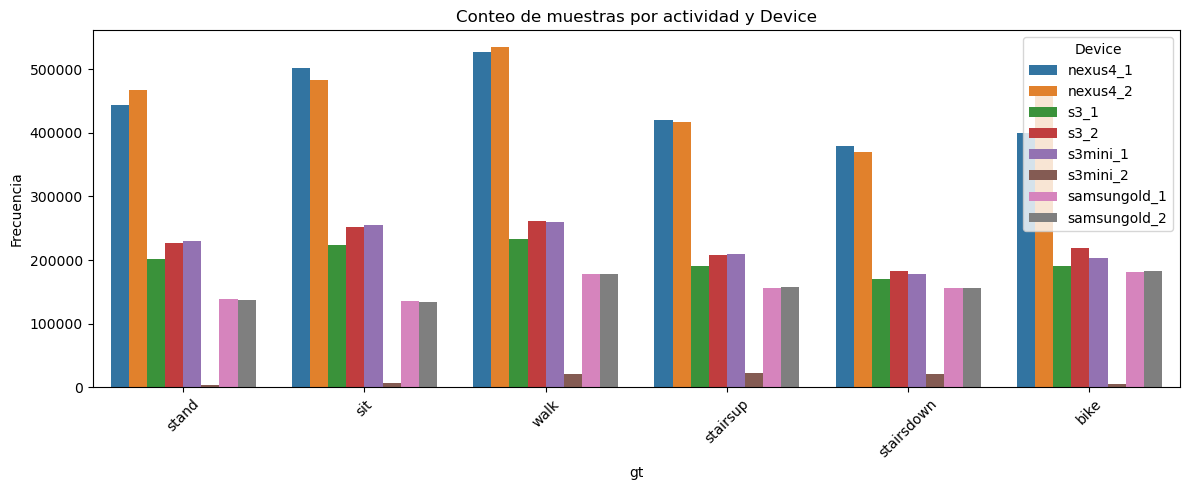

In [3]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_subset_ph_acc, x='gt', hue='Device', palette='tab10')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.title('Conteo de muestras por actividad y Device')
plt.tight_layout()
plt.show()

**Comentario:**
- Los distintos dispositivos muestran un número de muestras bastante distinto entre ellos, siendo `nexus4_1`y `nexus4_2` los dispositivos con mayor frecuencia de muestras en comparación a los demás.
- Que los dispositivos tengan menos nº de muestras puede deberse a diferentes factores como la propia duración de la grabación por dispositivo o la frecuencia de muestreo del sensor.
- En el caso del dispositivo `s3mini_2` puede deberse a una sesión incompleta, que la frecuencia de muestreo es muy baja o que hayan problemas técnicos de los sensores. Se puede ver que el nº de datos para este dispositivo es mayor en las actividades dinámicas a excepción de montar en bici.


In [4]:
# Observación de tipos de dispositivo
phones_accelerometer["Device"].unique()

array(['nexus4_1', 'nexus4_2', 's3_1', 's3_2', 's3mini_1', 's3mini_2',
       'samsungold_1', 'samsungold_2'], dtype=object)

In [5]:
# Filtración de datos según el tipo de dispotivo. En el ejemplo, el docente Javier Tousia selecciono "nexus4_1". 
# En nuestro caso, según la línea anterior, lo realizaremos para "nexus4_2".
df_subset_ph_acc= df_subset_ph_acc.where(
    df_subset_ph_acc["Device"] == "nexus4_2"
).dropna() # Datos de acelerómetro de teléfono
df_subset_ph_acc.info()

df_subset_ph_gyr= df_subset_ph_gyr.where(
    df_subset_ph_gyr["Device"] == "nexus4_2"
).dropna() # Datos de giroscopio de teléfono

df_subset_wat_acc= df_subset_wat_acc.where(
    df_subset_wat_acc["Device"] == "nexus4_2"
).dropna() # Datos de acelerómetro de reloj

df_subset_wat_gyr= df_subset_wat_gyr.where(
    df_subset_wat_gyr["Device"] == "nexus4_2"
).dropna() # Datos de giroscopio de reloj

<class 'pandas.core.frame.DataFrame'>
Index: 2734424 entries, 323817 to 12245161
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          float64
 1   Arrival_Time   float64
 2   Creation_Time  float64
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(6), object(4)
memory usage: 229.5+ MB


## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 1

Al ver las cinco primeras filas se pueden observar que las columnas `Arrival_Time` y `Creation_Time` corresponden a tiempos y dependiendo del análisis a realizar pueden no tener utilidad como input directo. Por otro lado, la columna `Index` parece ser un identificador. De este modo, las columnas 'x', 'y' y 'z' contienen los valores de las aceleraciones, mientras que las columnas `User`, `Model`, `Device` y `gt` contendrían la información sobre el tipo de usario, el modelo de teléfono, el tipo de dispositivo y el tipo de actividad respectivamente. Dependiendo del contexto de análisis, `User`, `Model` y `Device` se pueden utilizar como identificadores.

**Visualización extra:** Distribución de muestras por actividad.

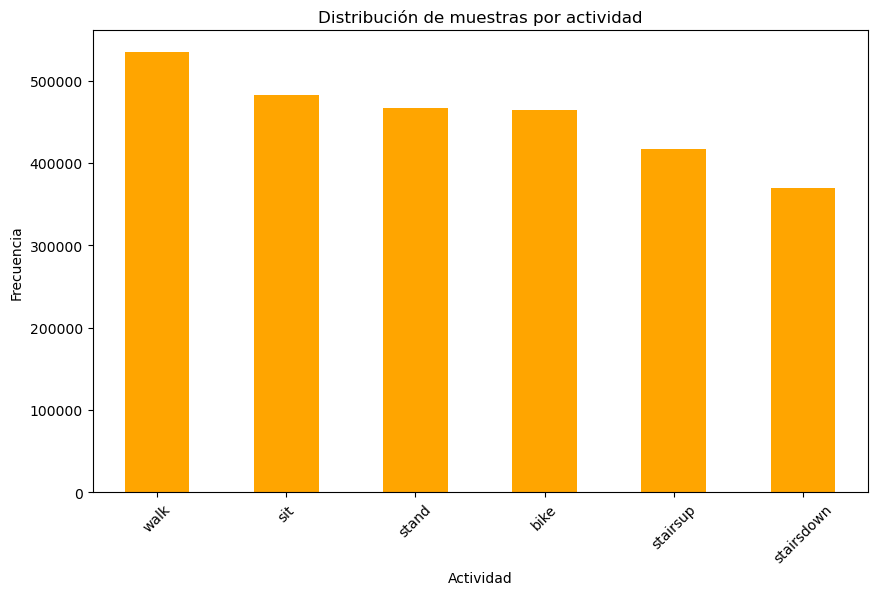

Frecuencia por actividad:
gt
walk          534161
sit           482244
stand         466907
bike          464413
stairsup      416670
stairsdown    370029
Name: count, dtype: int64


In [6]:
plt.figure(figsize=(10,6))
df_subset_ph_acc["gt"].value_counts().plot(kind='bar',figsize=(10,6), color='orange')

plt.title('Distribución de muestras por actividad')
plt.xlabel('Actividad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

print("Frecuencia por actividad:")
print(df_subset_ph_acc["gt"].value_counts())

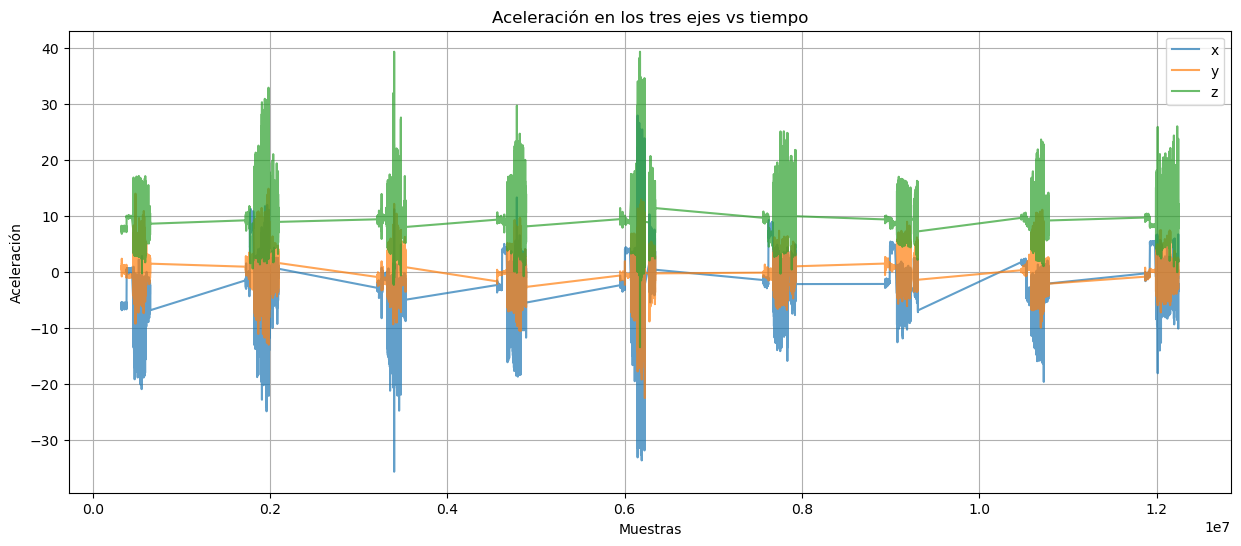

In [7]:
# Crear un gráfico de secuencia temporal para los tres ejes
plt.figure(figsize=(15, 6))
plt.plot(df_subset_ph_acc['x'], label='x', alpha=0.7)
plt.plot(df_subset_ph_acc['y'], label='y', alpha=0.7)
plt.plot(df_subset_ph_acc['z'], label='z', alpha=0.7)
plt.title('Aceleración en los tres ejes vs tiempo')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.legend()
plt.grid(True)
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 1

En la figura se muestra que las actividades 'walk' y 'sit tienen muchas más muestras, 534161 y 482244, en comparación que las otras como 'stairsdown' que contiene 370029. Esto puede impactar el balance del conjunto de datos haciendo que haya un sesgo hacia clases mayoritarias y métricas engañosas.

## Ejercicio 2: Estadísticas básicas de 'x', 'y', 'z'


🔹 **Qué hacer:** 
- Calcular media, desviación estándar, valores máximo y mínimo de las señales del acelerómetro ('x', 'y', 'z').
- Hacer un histograma de cada eje y Boxplots

🔹 **¿Por qué es importante?:** Ver rangos, outliers y planificar normalizaciones.

🔹 **Interpreta los resultados**


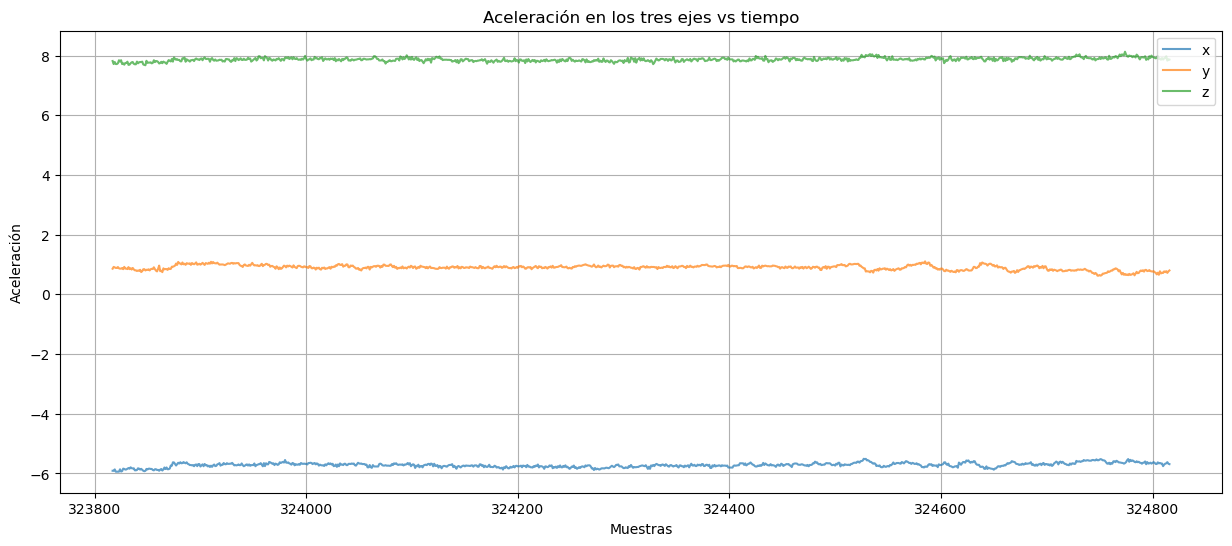

In [8]:
# Crear un gráfico de secuencia temporal para los tres ejes
plt.figure(figsize=(15, 6))
plt.plot(df_subset_ph_acc['x'].iloc[:1000], label='x', alpha=0.7)
plt.plot(df_subset_ph_acc['y'].iloc[:1000], label='y', alpha=0.7)
plt.plot(df_subset_ph_acc['z'].iloc[:1000], label='z', alpha=0.7)
plt.title('Aceleración en los tres ejes vs tiempo')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.legend()
plt.grid(True)
plt.show()

**Comentario:**
Graficando las primeras 10000 muestras de los tres ejes se observa que cada eje tienen un valor casi constante en el tiempo de aceleración. En el eje `x` e `y` se muestran en algunos muestras, entre 324400 y 324800 por ejemplo, pequeñas fluctuaciones. En cuanto al eje `z` se puede ver que presenta un valor cercano a los 9.8 $m/s^2$, indicando una relación con la componente de gravedad.

In [9]:
# Para obtener los estadísticos básicos que se nos piden se puede hacer de dos maneras:
# La primera aplicando las funciones una a una o en una agregación con el comand '.agg'
stats_02= df_subset_ph_acc[["x","y","z"]].agg(["mean","std","min","max"])
print("Método 1: Estadísticas descriptivas:")
print(stats_02)

# La segunda sería aplicando la función de pandas .describe() para generar un resumen estadístico de las columnas del conjunto de datos.
# Al igual que en el caso anterior, tenemos que indicar de que variables queremos que se haga el cuadro resumen de estadísticos básicos.
print("\nMétodo 2: Estadísticas descriptivas:")
df_subset_ph_acc[["x", "y", "z"]].describe()

Método 1: Estadísticas descriptivas:
              x          y          z
mean  -1.830048  -0.064962   8.931162
std    3.758047   1.534560   2.239050
min  -35.644820 -22.495117 -13.423874
max   27.928940  14.869568  39.318010

Método 2: Estadísticas descriptivas:


,x,y,z
count,2.734424e+06,2.734424e+06,2.734424e+06
mean,-1.830048e+00,-6.496158e-02,8.931162e+00
std,3.758047e+00,1.534560e+00,2.239050e+00
min,-3.564482e+01,-2.249512e+01,-1.342387e+01
25%,-4.058487e+00,-8.361206e-01,7.778091e+00
50%,-2.010178e+00,-1.481934e-01,9.086105e+00
75%,-3.153534e-01,8.206177e-01,9.782364e+00
max,2.792894e+01,1.486957e+01,3.931801e+01


**Visualización extra:** Histogramas de cada eje y Boxplots.

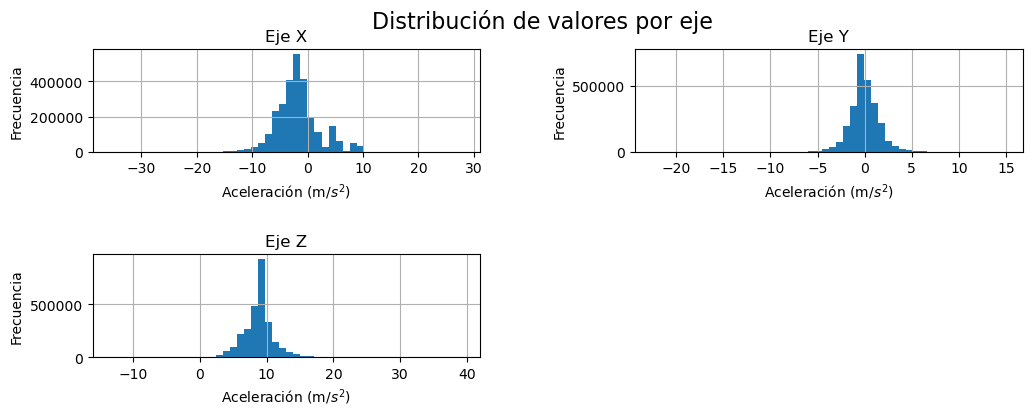

In [10]:
# Histogramas
axes_02= df_subset_ph_acc[["x", "y", "z"]].hist(
    figsize=(12, 4),
    bins=50)
plt.suptitle("Distribución de valores por eje", fontsize= 16)

# Personalizar cada subplot
axes_02 = axes_02.flatten()  # Asegura que sea un array plano
axes_02[0].set_title("Eje X")
axes_02[0].set_xlabel("Aceleración (m/$s^2$)")
axes_02[0].set_ylabel("Frecuencia")

axes_02[1].set_title("Eje Y")
axes_02[1].set_xlabel("Aceleración (m/$s^2$)")
axes_02[1].set_ylabel("Frecuencia")

axes_02[2].set_title("Eje Z")
axes_02[2].set_xlabel("Aceleración (m/$s^2$)")
axes_02[2].set_ylabel("Frecuencia")

plt.subplots_adjust(wspace=0.4, hspace=1) 
plt.show()


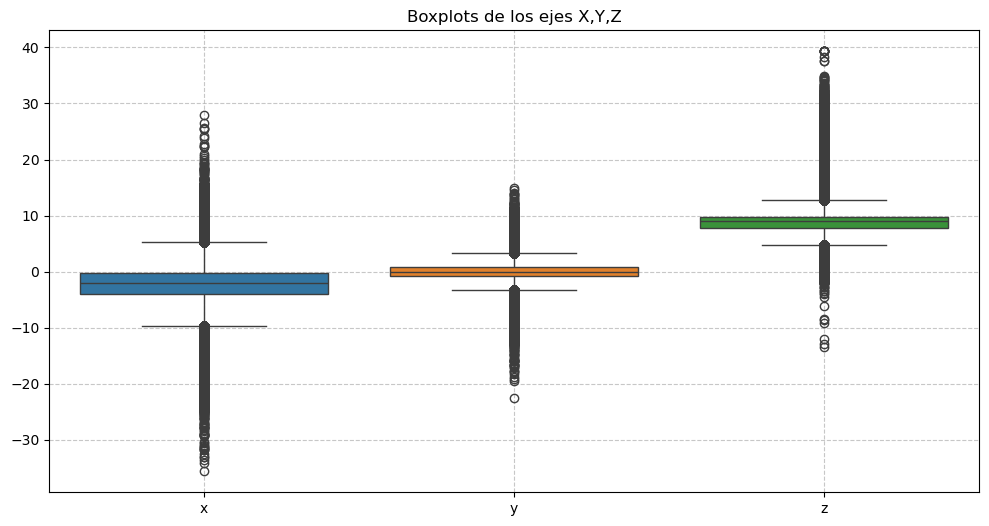

In [11]:
# Crear boxplots para visualizar outliers y distribuciones
plt.figure(figsize=(12,6))
sns.boxplot(data=df_subset_ph_acc[["x","y","z"]])
plt.title("Boxplots de los ejes X,Y,Z")
plt.grid(True,linestyle="--",alpha=0.7)
plt.show()

C:\Users\Willy\AppData\Local\Temp\ipykernel_22000\103906674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melt, x='axis', y='val', palette='Pastel1', inner=None)  # sin inner


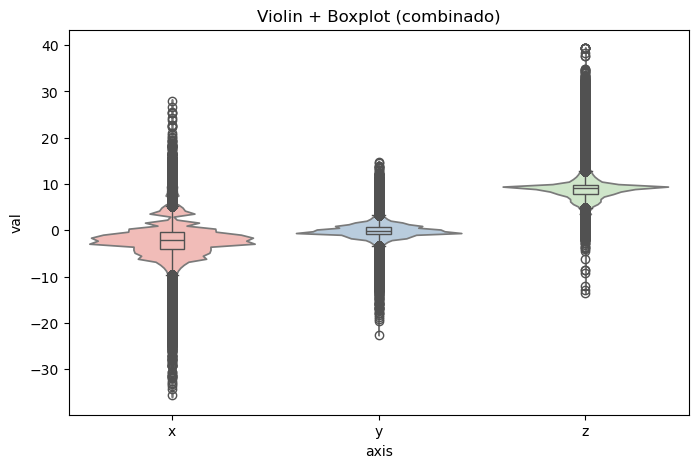

In [12]:
df_melt = df_subset_ph_acc[['x','y','z']].melt(var_name='axis', value_name='val')
plt.figure(figsize=(8,5))
sns.violinplot(data=df_melt, x='axis', y='val', palette='Pastel1', inner=None)  # sin inner
sns.boxplot(data=df_melt, x='axis', y='val', width=0.12, showcaps=True,
            boxprops={'zorder':2, 'facecolor':'none'}, whiskerprops={'linewidth':1.0})
plt.title('Violin + Boxplot (combinado)')
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 2
 
**Histograma:**
En general, los resultados muestran que la media de 'z' es mayor, 8.931162 $m/s^2$, con respecto a 'x' e 'y' de -1.830048 y -0.064962 $m/s^2$, lo que se 
interpreta que el movimiento vertical es relevante y está principalmente alineado con la fuerza de la gravedad. Los resultados cercanos a 0 de 'x' e 'y' 
sugieren que el dispositivo estuvo mayoritariamente en reposo o con un movimiento lateral y longitudinal mínimo. Por otro lado, el eje 'x' es el que muestra 
una dispersión, con una desviación de 3.758047 $m/s^2$ y una aceleración máxima y mínima de 27.928940 y -35.644820 $m/s^2$ (Rango de 63.57376, el mayor rango 
de max-min de los ejes).

**Boxplot:**
En primer lugar, se observa como las medianas estan desplazadas, siendo la del eje 'x' ligeramente negativa, mientras que la del eje 'z' está por encima de cero. Los ejes 'x' e 'y' parecen ser más semetricos alrededor de la mediana, mientras que el eje 'z' presenta una ligera asimetría hacia valores altos. También, se observa una gran diferencia del rango interquantílico entre los ejes. El eje 'x' presenta un mayor rango intercuantil que en los ejes 'y' y 'z', lo que indica una mayor variabilidad en lso valores del eje 'x'. Por otro lado, se identifican *outliers* en los tres ejes. Sin embargo, la variabilidad de *outliers* tanto en el eje 'x' como el 'y' para ambas direcciones es semejante, mientras que en el eje 'z' los *outliers* superiores presentan una mayor variabilidad que los inferiores.

**Violin:**
Con diagrama de violin lo que vemos es una visión más completa de la distribución. Nos aporta tanto la densidad de los datos con su forma de distribución, al igual que la simetría y las colas. Es una forma de combinar los datos que aporta el boxplot y los histogramas.

En conclusión, dado que los rangos de los tres ejes son bastante diferentes, se recomienda escalar datos y considerar métodos robustos si se aplican modelos.


## Ejercicio 3: Filtrar actividades específicas (walk vs sit)

🔹 **Qué hacer:**  
- Filtra el DataFrame `df_subset_ph_acc` para obtener dos nuevos subconjuntos: uno con los registros de la actividad `walk` y otro de `sit`.
- Muestra el número de registros para cada actividad.
- Representa los resultados en un **gráfico de barras** comparando el número de muestras de `walk` vs `sit`.

🔹 **¿Por qué es importante?:**  
- Filtrar datos por condiciones específicas es fundamental para realizar análisis focalizados.
- Visualizar el balance entre clases ayuda a detectar posibles problemas de desbalanceo, muy relevantes para la calidad de los modelos de predicción.

🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?
- ¿Qué problemas podría traer un desbalance muy grande entre clases?
- ¿Cómo podrías corregir un desbalance si fuera necesario?


In [13]:
# Asegurar que existe la columna 'mod' (magnitud)
if 'mod' not in df_subset_ph_acc.columns:
    df_subset_ph_acc['mod'] = np.sqrt(df_subset_ph_acc['x']**2 + df_subset_ph_acc['y']**2 + df_subset_ph_acc['z']**2)

df_walk= df_subset_ph_acc[df_subset_ph_acc["gt"]== "walk"]
df_sit= df_subset_ph_acc[df_subset_ph_acc["gt"]== "sit"]

print(f"Número de muestras para 'walk': {len(df_walk)}")
print(f"Número de muestras para 'sit': {len(df_sit)}")

Número de muestras para 'walk': 534161
Número de muestras para 'sit': 482244


**Visualización extra:** Comparativa del número de muestras.

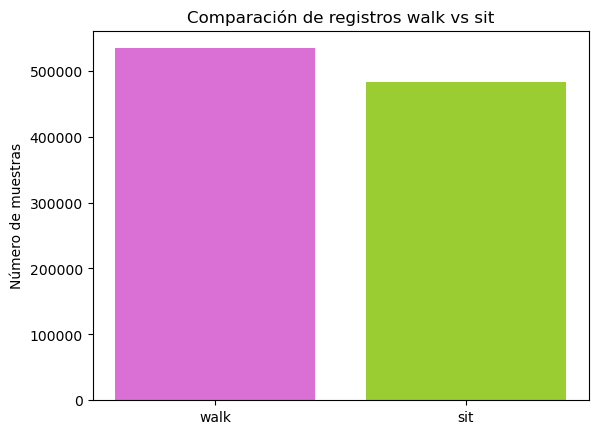

In [14]:
plt.bar(
    ["walk", "sit"], [df_walk.shape[0], df_sit.shape[0]], color=["orchid", "yellowgreen"]
)
plt.title("Comparación de registros walk vs sit")
plt.ylabel("Número de muestras")
plt.show()

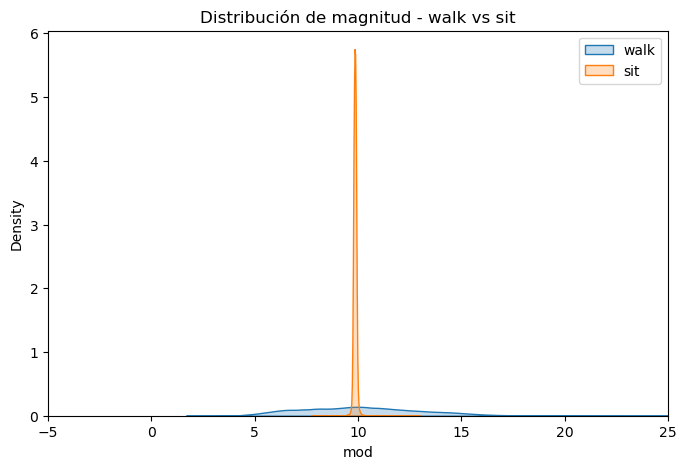

In [15]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_walk['mod'], label='walk', fill=True, bw_adjust=0.5)
sns.kdeplot(df_sit['mod'], label='sit', fill=True, bw_adjust=0.5)
plt.legend()
plt.title('Distribución de magnitud - walk vs sit')
plt.xlim(-5, 25)
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 3

Se muestra un mayor registro para caminar (`walk`) con 534161 muestras que en estar sentado (`sit`) con 482244 muestras. Se trata de una diferencia de 51917 
muestras, que no es tan grande.

**1. Equilibrio de muestras entre `walk` y `sit`:**
- Si el número de registros de ambas actividades es similar, el dataset está equilibrado.
- Si hay una gran diferencia de registros, existe un desbalance que podría afectar futuros análisis o modelos.

En este caso, el dataset muestra 534,161 registros para `walk` y 482,244 para `sit`, con una diferencia de aproximadamente 10.8%. Esto indica que el conjunto está relativamente equilibrado, aunque existe un ligero predominio de la clase `walk`. Aún así, un modelo podría aprencer bien con este reparto.

**2. Problemas de un desbalance de clases:**
Un desbalance significativo puede provocar que los modelos predictivos se sesguen hacia la clase mayoritaria, reduciendo la capacidad para identificar correctamente la clase minoritaria. Esto puede generar métricas engañosas, como alta precisión global pero bajo recall para la clase menos representada, afectando la calidad del análisis y la generalización del modelo.

**3. Estrategias para corregir desbalance:**
Existen varias estrategias:

- **Submuestreo** de la clase mayoritaria para reducir su tamaño.
- **Aumento de muestras** de la clase minoritaria mediante técnicas de data augmentation o generación sintética (por ejemplo, SMOTE).
- **Asignación de pesos** en el modelo para penalizar errores en la clase minoritaria.
- **Uso de métricas** adecuadas como F1-score y balanced accuracy para evaluar el rendimiento.

**Gráfico de maginitud:**
Dibujando la magnitud de tres ejes combinados para las distintas actividades se observa que la magnitud e `sit` es una curva mucho más estrecha que en `walk` y se encuentra centrada en 10. Esto indica que cuando la persona está sentada, la aceleración es casi constante (solo la gravedad), sin variaciones significativas. Mientras tanto, en `walk` hay unas mayores variaciones en la aceleración debido al movimiento.

**Conclusión:**
Identificar el balance de clases al inicio es clave para definir la estrategia de preparación de los datos y evitar resultados engañosos en etapas posteriores del análisis.



## Ejercicio 4: Agrupación por actividad y Gráfico comparativo de actividades
🔹 **Qué hacer:** 
- Agrupar por tipo de actividad y calcular medias de 'x', 'y', 'z'.
- Hacer un gráfico de barras de medias de 'x', 'y', 'z' para 'walk', 'sit' y 'stairsup'.

🔹 **¿Por qué es importante?:** 
- Permite comparar globalmente la dinámica de cada actividad y ver si son fáciles de distinguir.
- Visualizar los patrones ayuda a detectar actividades más fáciles o difíciles de clasificar.

🔹 **Interpretación esperada:** Actividades dinámicas como caminar, correr, subir escaleras deberían tener aceleraciones mayores que sentarse.

🔹 **Preguntas para reflexión:**
- ¿Qué actividades parecen más similares entre sí?
- ¿Qué actividades podrían confundirse en un modelo de clasificación?
- ¿Qué actividad tiene el perfil de aceleración más alto?
- ¿Podríamos usar esta diferencia directamente como una característica para clasificación?




In [16]:
# Solución
activities= phones_accelerometer["gt"].unique()
df_mean_activities= phones_accelerometer.groupby("gt")[["x","y","z"]].mean()
df_mean_activities

,x,y,z
gt,,,
bike,-1.337308,-0.068326,9.399014
sit,3.762870,0.155249,8.438220
stairsdown,-3.216161,0.198635,8.869204
stairsup,-3.903135,0.124511,8.482344
stand,-2.419891,0.353311,9.194293
walk,-2.909116,0.158189,9.070242


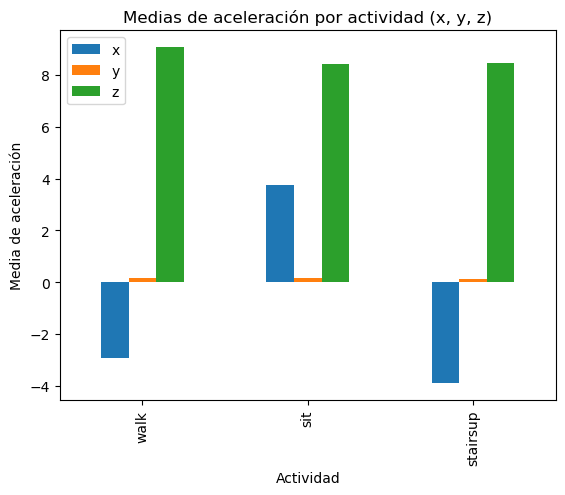

In [17]:
# Gráfico de medias de los ejes de aceleración para "walk", "sit" y "stairsup"
selection= ["walk","sit","stairsup"]
df_selected_acts= df_mean_activities.loc[selection]

df_selected_acts.plot(kind="bar")
plt.title("Medias de aceleración por actividad (x, y, z)")
plt.xlabel("Actividad")
plt.ylabel("Media de aceleración")
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 4

- **Actividad con el perfil de aceleración más alto**
Observando la figura, el eje `z` para la actividad `walk` la media es más alta, alcanzando los 9 $m/s^2$, mientras que `sit` y `stairsup` están ligeramente por debajo. Además, se destacan dos aspectos más: Las medias del eje `x` para `walk` y `stairsup` son negativas, a diferencia de `sit` que es positiva; y que los valores medios para el eje `y` son muy parecidos en las tres actividades.
.0
- **¿Podríamos usar esta diferencia directamente como una característica para clasificación?**
Sí, la media de aceleración por eje es una característica útil, porque muestra patrones claroes entre estas tres actividades. Por ejemplo:
    - `walk` tiene valores negativos en `x` y muy altos en `z`.
    - `sit` tiene valores positivos en `x` y altos en `z`.
    - `stairsup` tiene valores negativos en `x` y altos en `z`,, pero con diferencias de magnitud
Sin embargo, no bastaría con una sola caracterísitca ya que hay similitudes entre actividades. Sería mejor utilizar el vector completo (`x`,`y`,`z`) o derivar a otros atributos como la varianza o rango para mejorar la sepración.

## Ejercicio 5: Clasificación de actividades

🔹 **Qué hacer:**  
- Crea una nueva columna `activity_type` en el DataFrame, clasificando las actividades de la columna `gt` en **"Dinámica"** (`walk`, `stairsup`, `stairsdown`, `run`, `bike`) o **"Estática"** (el resto).  
- Muestra una tabla con las primeras filas (`head()`) mostrando `gt` y `activity_type`.  
- Representa en una **gráfica de barras** la cantidad de muestras de actividades "Dinámica" y "Estática".

🔹 **¿Por qué es importante?:**  
- Saber transformar datos categóricos en grupos más simples es clave para entender mejor los datos y preparar análisis o modelos más robustos.  
- Aprenderás a crear nuevas columnas de forma programada, un paso esencial en cualquier proyecto de análisis de datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pasa si agregamos o quitamos actividades de la clasificación?  
- ¿Crees que esta agrupación podría afectar a un modelo que predice tipos de actividad? ¿Por qué?  
- ¿Qué otras maneras de agrupar actividades se te ocurren?

Primeras filas mostrando gt y activity_type
           gt activity_type
323817  stand      Estática
323818  stand      Estática
323819  stand      Estática
323820  stand      Estática
323821  stand      Estática




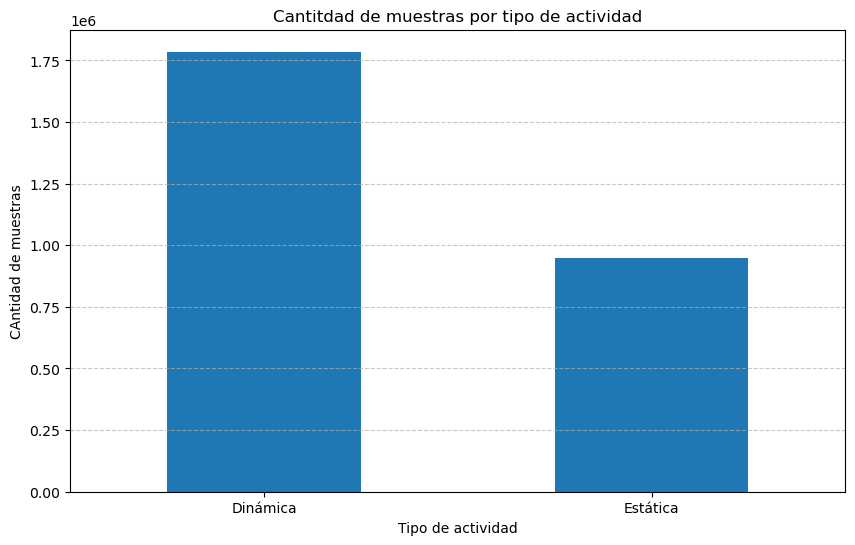

In [18]:
# Solución
# Creación de columna nueva "activity_type"
dynamic_acts= ["walk","stairsup","stairsdown","bike"]
df_subset_ph_acc["activity_type"]= df_subset_ph_acc["gt"].apply(lambda x: "Dinámica" if x in dynamic_acts else "Estática")

# Mostrar primeras filas con columnas gt y activity_type
print("Primeras filas mostrando gt y activity_type")
print(df_subset_ph_acc[["gt", "activity_type"]].head())
print("\n")

#Crear gráfico de barras con cantidad de muestras por tipo de actividad
plt.figure(figsize=(10,6))
activity_counts= df_subset_ph_acc["activity_type"].value_counts()
activity_counts.plot(kind="bar")
plt.title("Cantitdad de muestras por tipo de actividad")
plt.xlabel("Tipo de actividad")
plt.ylabel("CAntidad de muestras")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--",alpha=0.7)
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 5

**1. Impacto de modificar la clasificación:**
Agregar o quitar actividades cambia la distribución de datos y puede generar desbalances entre clases, afectando tanto la interpretación estadística como el rendimiento del modelo. Además, modificar categorías puede alterar la representatividad del conjunto, lo que influye en la validez de las conclusiones.

**2. Efecto en un modelo de predicción:**
Agrupar actividades distintas bajo una misma etiqueta reduce la complejidad, pero también disminuye la precisión si el objetivo es identificar actividades específicas. Esta simplificación puede ser útil para modelos binarios (p.ej., dinámicas vs estáticas), pero perjudicial para modelos que requieren granularidad. También puede aumentar la confusión entre clases similares (p.ej., walk y stairsup).

**3. Propuestas alternativas de agrupación:**
- **Por intensidad física:** Baja, media, alta (útil en salud y deporte).
- **Por contexto:** Interior vs exterior (aplicaciones de ubicación).
- **Por desplazamiento:** Con movimiento espacial vs sin movimiento (análisis de movilidad).
- **Por postura:** De pie, sentado, en movimiento (ergonomía).
- **Por impacto médico:** Sedentarias vs activas (estudios epidemiológicos).
- **Por patrón temporal:** Actividades cortas vs prolongadas (análisis de hábitos).

**Conclusión:**
El modo de agrupar actividades depende del objetivo del análisis: una clasificación bien diseñada puede simplificar los datos sin perder información relevante, pero siempre es necesario evaluar los efectos secundarios en la interpretación y en el rendimiento del modelo.
Como sugerencia, antes de definir agrupaciones conviene analizar la similitud entre actividades mediante métricas como distancia euclidiana, correlaciones o técnicas de clustering. Esto permite crear grupos basados en patrones reales, evitando decisiones arbitrarias y mejorando la coherencia del análisis y la precisión del modelo.

## Ejercicio 6: Comparativa Teléfono vs Reloj (Acelerómetro)

🔹 **Qué hacer:**  
- Filtra el DataFrame para quedarte sólo con las actividades `walk` y `sit`.  
- Crea dos subconjuntos de datos: uno para el teléfono (`ph_acc_common`) y otro para el reloj (`wat_acc_common`).  
- Representa en un **histograma** la distribución de las aceleraciones en el eje **X** para ambos dispositivos, en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Comparar datos de distintos dispositivos para las mismas actividades permite entender mejor las diferencias de captación de los sensores.  
- Aprenderás a utilizar filtros en pandas y a superponer múltiples distribuciones en un solo gráfico para compararlas de manera visual.

🔹 **Preguntas para reflexión:**  
- ¿Observas diferencias claras en las distribuciones de aceleración entre el teléfono y el reloj?  
- ¿Qué factores pueden causar esas diferencias, incluso realizando la misma actividad?  
- ¿Qué implicaciones crees que tendría esta diferencia al entrenar un modelo de predicción?


In [19]:
# Filtro de actividades comunes
acts_06 = ["walk","sit"]

ph_acc_common= phones_accelerometer[phones_accelerometer["gt"].isin(acts_06)]
wat_acc_common= watch_accelerometer[watch_accelerometer["gt"].isin(acts_06)]

**Visualización extra:** Histograma comparativo de aceleraciones en 'walk' y 'sit'.

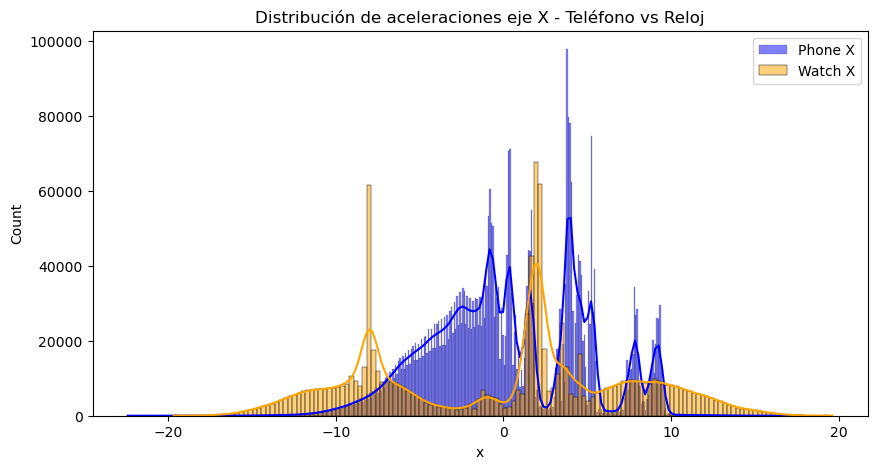

In [20]:
# Histograma de aceleraciones X para teléfono y reloj
plt.figure(figsize=(10, 5))
sns.histplot(ph_acc_common["x"], color="blue", label="Phone X", kde=True)
sns.histplot(wat_acc_common["x"], color="orange", label="Watch X", kde=True)
plt.legend()
plt.title("Distribución de aceleraciones eje X - Teléfono vs Reloj")
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 6

**1. Diferencias observadas en las distribuciones:**
Generalmente, se observan diferencias claras entre las aceleraciones registradas por el teléfono y el reloj.
 - **Teléfono (azul):**
    - Distribución más concentrada cerca de 0, con varios picos pronunciados.
    - Menor dispersión hacia valores extremos (entre -10 y +10 aproximadamente).
    - Presenta más irregularidades y picos, lo que indica variabilidad en la posición del teléfono.

- **Reloj (naranja):**
    - Distribución más suave y extendida, con valores que llegan hasta -15 y +15.
    - Tiene un pico marcado alrededor de -10, posiblemente por la orientación del brazo en reposo.
    - Menos picos abruptos, lo que sugiere una señal más estable en ciertas posiciones.

**2. Factores que causan las diferencias:**
- **Posición del dispositivo:**
    - El teléfono suele estar en el bolsillo, mano o mesa → orientación variable.
    - El reloj está fijo en la muñeca → movimientos más relacionados con el brazo.

- **Orientación del eje X:**
    - Cada dispositivo puede tener distinta referencia del eje X según su diseño.

- **Ruido y sensibilidad del sensor:**
    - Diferentes acelerómetros, frecuencias de muestreo y calibración.

- **Micro-movimientos:**
    - El reloj capta movimientos pequeños del brazo (gestos), mientras que el teléfono capta movimientos más globales del cuerpo.

**3. Implicaciones en el entrenamiento de modelos:**
- **Dominio distinto:**
    - Un modelo entrenado con datos del teléfono puede no generalizar bien al reloj (y viceversa).

- **Necesidad de normalización o alineación:**
    - Se requiere estandarizar ejes y rangos para reducir sesgo.

- **Posible enfoque multimodal:**
    - Si se usan ambos dispositivos, el modelo debe aprender a combinar señales heterogéneas.

- **Riesgo de sobreajuste:**
    - Si el modelo aprende patrones específicos de un dispositivo, fallará en otro.

**Conclusión:**
Las distribuciones de aceleración del teléfono y del reloj presentan diferencias claras en forma, rango y concentración.

- Teléfono: rango aproximado entre -10 a +10 $m/s^2$, con picos muy marcados en torno a 0 $m/s^2$ y 5 $m/s^2$, lo que indica mayor estabilidad.
- Reloj: rango mucho más amplio (-20 a +15 $m/s^2$), con una dispersión notable y picos menos definidos, reflejando movimientos más bruscos y variados.

Estas diferencias se explican por la posición del dispositivo, la orientación de los ejes y la sensibilidad de los sensores. Como consecuencia, entrenar un modelo con datos de un solo dispositivo puede generar sesgos y limitar la capacidad de generalización.

La varianza del reloj es significativamente mayor, complicando la comparación directa para modelos predictivos.

Las diferencias entre sensores deben ser gestionadas cuidadosamente en la etapa de preprocesamiento para garantizar que el análisis y los modelos de predicción sean fiables y generalizables. Esto implica aplicar técnicas como:
- Normalización y escalado de rangos.
- Alineación de ejes y calibración entre dispositivos.
- Posible diseño de modelos específicos o multimodales.

## Ejercicio 7: Comparativa Acelerómetro vs Giroscopio (Teléfono)

🔹 **Qué hacer:**  
- Filtra los datos del giroscopio del teléfono para quedarte solo con las actividades `walk` y `sit`, igual que en el acelerómetro.
- Representa en un **histograma** las distribuciones de aceleraciones en el eje **X** para el acelerómetro (`ph_acc_common`) y para el giroscopio (`ph_gyr_common`), en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Ver qué sensor aporta más información según el tipo de actividad ayuda a optimizar modelos de reconocimiento de actividades.
- Entender qué diferencias existen entre acelerómetro y giroscopio permite seleccionar el sensor adecuado para cada problema.

🔹 **Preguntas para reflexión:**  
- ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?
- ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?
- ¿Podría ser interesante combinar la información de ambos sensores?


In [21]:
# Filtro de actividades comunes también para giroscopio
acts_07= ["walk","sit"]
ph_gyr_common= phones_gyroscope[phones_gyroscope["gt"].isin(acts_07)]
ph_gyr_common

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
55831,55831,1424696945006,1424696943016976761,-0.138992,-0.254837,0.075958,a,nexus4,nexus4_1,sit
55832,55832,1424696945010,1424696943021852067,-0.137924,-0.258041,0.083435,a,nexus4,nexus4_1,sit
55833,55833,1424696945016,1424696943026917985,-0.136856,-0.260178,0.091980,a,nexus4,nexus4_1,sit
55834,55834,1424696945021,1424696943031953385,-0.140060,-0.260178,0.099457,a,nexus4,nexus4_1,sit
55835,55835,1424696945026,1424696943036958268,-0.142197,-0.260178,0.104797,a,nexus4,nexus4_1,sit
...,...,...,...,...,...,...,...,...,...,...
13932138,10817,1424777372432,79191341335000,0.130773,-0.227877,-0.091004,i,s3mini,s3mini_2,walk
13932139,10818,1424777372447,79191355918000,-0.103447,0.253250,-0.147119,i,s3mini,s3mini_2,walk
13932140,10819,1424777372458,79191367298000,-0.151267,0.445506,-0.202991,i,s3mini,s3mini_2,walk
13932141,10820,1424777372473,79191381759000,-0.145412,0.519676,-0.236172,i,s3mini,s3mini_2,walk


**Visualización extra:** Histogramas superpuestos de aceleraciones vs velocidades angulares (eje X).

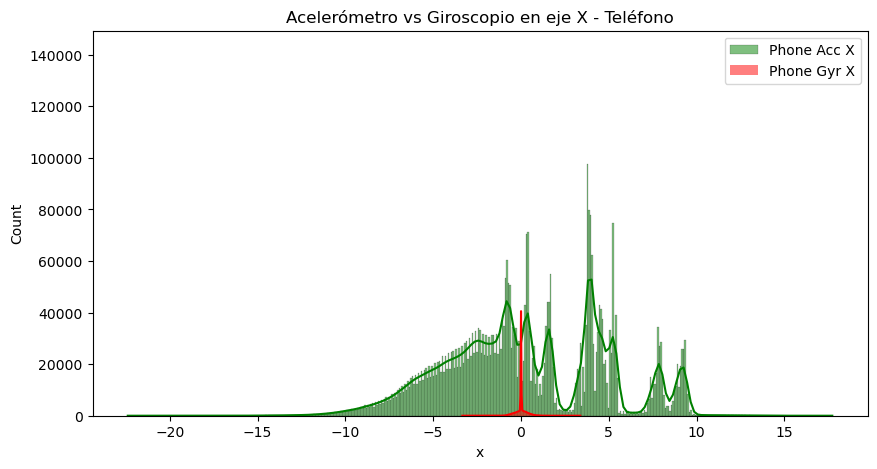

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(ph_acc_common["x"], color="green", label="Phone Acc X", kde=True)
sns.histplot(ph_gyr_common["x"], color="red", label="Phone Gyr X", kde=True)
plt.legend()
plt.title("Acelerómetro vs Giroscopio en eje X - Teléfono")
plt.show()

## COMENTARIO E INTERPRETACIÓN DEL EJERCICIO 7

**1. ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?**
 - Acelerómetro (verde):
    - Mide aceleración lineal, por lo que su distribución refleja cambios de velocidad en línea recta.
    - Distribución amplia, con valores que van aproximadamente de -10 $m/s^2$ a +10 $m/s^2$, incluso algunos extremos hasta -20 $m/s^2$.
    - Presenta múltiples picos, especialmente cerca de 0 $m/s^2$ y entre 3-6 $m/s^2$, lo que indica variabilidad en aceleraciones lineales.
    - En actividades como `sit`, suele ser más estable, mientras que en `walk` muestra variabilidad moderada.

- Giroscopio (rojo):
    - Mide velocidad angular, es decir, los cambios en la orientación del dispositivo.
    - Distribución mucho más concentrada alrededor de 0, con un rango muy estrecho (aprox. -2 a +2 rad/s).
    - Señal más estable, sin grandes picos ni dispersión.
    - En actividades como `walk`, puede mostrar mayor variabilidad debido a la oscilación natural del cuerpo, mientras que en `sit` ambos sensores presentan menor variabilidad.

**2. ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?**
- Actividades con rotación significativa:
    - Girar el dispositivo (por ejemplo, cambiar orientación del teléfono).

**3. Combinación de sensores:**
- Al fusionar ambas fuentes de información, se consigue un perfil de movimiento más completo y robusto, ya que el acelerómetro aporta datos sobre traslación y vibración, mientras que el giroscopio aporta información sobre rotación y orientación.

- Esta combinación se conoce como fusión de sensores, una técnica común en aplicaciones de inteligencia artificial y dispositivos wearables, que permite reducir ambigüedades y mejorar la generalización del modelo.

- Beneficios concretos:
    - Mayor precisión en clasificación de actividades complejas (por ejemplo, caminar vs girar).
    - Mejora en sistemas de navegación inercial y reconocimiento de gestos.
    - Reducción de errores en entornos con ruido o movimientos irregulares.

**Conclusión:**

El análisis evidencia diferencias claras entre acelerómetro y giroscopio. El acelerómetro mide aceleraciones lineales en $m/s^2$, mientras que el giroscopio mide rotaciones en velocidad angular (rad/s), por lo que trabajan en escalas distintas: el acelerómetro incluso detecta la gravedad (≈9.8 $m/s^2$), mientras que el giroscopio registra valores mucho más pequeños. En la figura, el acelerómetro presenta picos intensos cerca de 0 $m/s^2$ y alrededor de 5 $m/s^2$, con una distribución amplia que llega aproximadamente de -10 a +10 $m/s^2$, lo que indica gran variabilidad en aceleraciones lineales. El giroscopio, en cambio, aparece muy concentrado cerca de cero, con escasa variabilidad, confirmando que las rotaciones son mínimas en actividades suaves como caminar o sentarse. Esto demuestra que el acelerómetro es más rico para detectar movimientos lineales y actividades suaves, mientras que el giroscopio resulta más útil en movimientos rotacionales bruscos, como giros rápidos, deportes o gestos complejos.

Estas diferencias tienen implicaciones importantes para el modelado: entrenar un modelo solo con giroscopio podría perder información relevante en actividades cotidianas, mientras que usar solo acelerómetro limita la detección de rotaciones. Además, como las escalas son diferentes (m/s² vs rad/s), es necesario aplicar normalización antes de combinar datos para evitar sesgos. Por ello, combinar datos de acelerómetro y giroscopio puede mejorar significativamente la precisión de los modelos de reconocimiento de actividades. Al fusionar ambas fuentes se obtiene un perfil de movimiento más completo y robusto, aprovechando la información de traslación y rotación. Esta técnica, conocida como fusión de sensores, es habitual en aplicaciones de inteligencia artificial y dispositivos wearables, ya que reduce ambigüedades y mejora la generalización del modelo en escenarios complejos. 

## Ejercicio 8: Correlación entre sensores

🔹 **Qué hacer:**  
- Une los datos del acelerómetro (`ph_acc_common`) y del giroscopio (`ph_gyr_common`) usando solo los ejes 'x', 'y', 'z', ajustando los índices.
- Crea un nuevo DataFrame combinando ambos sensores.
- Calcula y visualiza la **matriz de correlación** entre todas las variables usando un **mapa de calor**.

🔹 **¿Por qué es importante?:**  
- Entender la correlación entre sensores ayuda a detectar si hay redundancia (información duplicada) o complementariedad (información adicional).
- Saber qué variables están correlacionadas permite optimizar modelos, eliminar variables innecesarias o detectar relaciones ocultas en los datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pares de variables presentan mayor correlación?
- ¿Existe más correlación entre ejes del mismo sensor o entre sensores diferentes?
- ¿Cómo podrías usar esta información para mejorar un modelo de predicción?


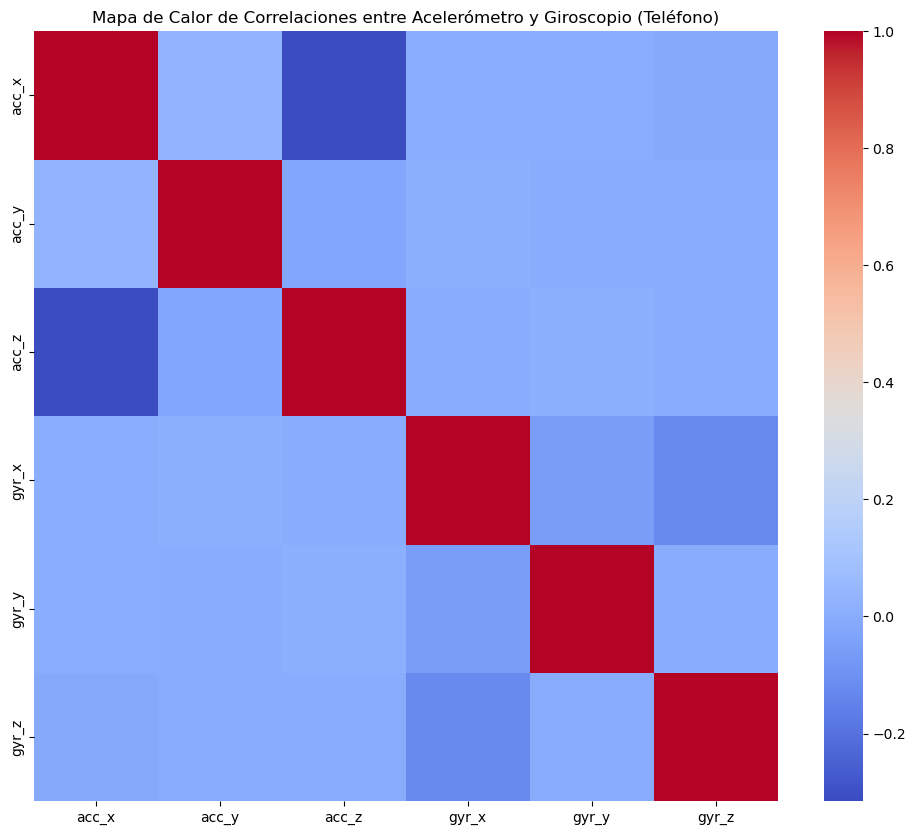

In [23]:
# Unir datasets de ph_acc y ph_gyr para correlación
ph_acc_small = ph_acc_common[["x", "y", "z"]].reset_index(drop=True)
ph_gyr_small = ph_gyr_common[["x", "y", "z"]].reset_index(drop=True)

combined = pd.concat(
    [ph_acc_small.add_prefix("acc_"), ph_gyr_small.add_prefix("gyr_")], axis=1
)

# Matriz de correlación
corr_matrix = combined.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Mapa de Calor de Correlaciones entre Acelerómetro y Giroscopio (Teléfono)")
plt.show()

## Interpretación del ejercicio de correlación entre sensores

**1. ¿Qué pares de variables presentan mayor correlación?**
- En este caso, la correlación más alta se observa entre ejes del mismo sensor.
- También se aprecia una correlación negativa entre `acc_x` y `acc_z`.
- Entre acelerómetro y giroscopio, las correlaciones son muy bajas, lo que indica que sus señales son prácticamente independientes.

**2. Correlación intra-sensor vs inter-sensor:**
- La correlación es claramente más alta entre los ejes del acelerómetro que entre sensores diferentes.
- Entre acelerómetro y giroscopio, la correlación es mínima porque miden fenómenos distintos: aceleración lineal frente a velocidad angular.

**3. Uso de la información de correlación en modelos:**
- Si dos variables están muy correlacionadas (como `acc_y` y `acc_z`), podríamos aplicar técnicas como PCA o eliminar una para reducir redundancia y evitar multicolinealidad en modelos lineales.
- La baja correlación entre sensores distintos sugiere que ambos aportan información complementaria, por lo que conviene utilizarlos juntos para enriquecer el modelo y mejorar la precisión.

**Conclusión:**

El análisis del mapa de correlación muestra que las relaciones más fuertes se dan entre ejes del mismo sensor, mientras que entre acelerómetro y giroscopio las correlaciones son muy bajas. Esto confirma que ambos sensores capturan fenómenos distintos: el acelerómetro mide aceleración lineal y el giroscopio velocidad angular, por lo que aportan información complementaria. Aunque se observa ligera correlación interna entre ejes del acelerómetro, no hay redundancia significativa entre sensores, lo que refuerza la idea de que su combinación puede enriquecer el modelo. Correlaciones bajas entre acelerómetro y giroscopio indican diversidad de información, mientras que correlaciones moderadas entre ejes del mismo sensor pueden sugerir redundancia parcial, útil para aplicar técnicas como PCA o selección de variables.

En conclusión, la baja correlación entre sensores diferentes y la ligera correlación interna entre ejes del mismo sensor confirman que combinar acelerómetro y giroscopio en modelos puede mejorar el rendimiento por la diversidad de información. Esta complementariedad permite construir modelos más robustos y precisos, aprovechando la riqueza de datos sin redundancia excesiva.

**Resumen de la comparativa realizada**

- **Datos de reloj** son más ruidosos ➔ mayor dispersión ➔ mayor reto para modelos.
- **Acelerómetro** es crítico para actividades suaves.
- **Giroscopio** complementa bien en actividades dinámicas.
- **Combinar acelerómetro y giroscopio** podría mejorar la precisión del modelo.

# Flexible Classification Framework

This framework provides a comprehensive and flexible solution for training classification models on the HAR (Human Activity Recognition) dataset.

## Features

### 1. **Configurable Features (X)**
Select any combination of numeric columns as input features:
- `['x', 'y', 'z']` - Accelerometer axes
- `['x', 'y', 'z', 'mod']` - Including magnitude
- `['x', 'y']` - Subset of features
- Any other numeric columns from the dataset

### 2. **Configurable Target (y)**
Choose from categorical columns for classification:
- **Binary Classification**: `'activity_type'` (Dinámica/Estática)
- **Multi-class Classification**: `'gt'` (walk, sit, stand, stairsup, stairsdown, bike, etc.)

### 3. **Multiple Classification Models**
Switch between different algorithms:
- **`'logistic'`** - Logistic Regression (linear, fast, interpretable)
- **`'random_forest'`** - Random Forest (ensemble, robust, feature importance)
- **`'decision_tree'`** - Decision Tree (interpretable, fast)
- **`'knn'`** - K-Nearest Neighbors (instance-based, no training)
- **`'svm'`** - Support Vector Machine (good for non-linear boundaries)

## Usage

Simply modify the three configuration variables at the top of the code cell:

```python
FEATURES = ['x', 'y', 'z']      # Select features
TARGET = 'activity_type'        # Select target variable
MODEL_TYPE = 'logistic'        # Select model type
```

## Output

The framework automatically provides:
- ✅ Data validation and summary statistics
- ✅ Training and test accuracy metrics
- ✅ Detailed classification report (precision, recall, F1-score)
- ✅ Confusion matrix (text and visualization)
- ✅ Feature importance/coefficients analysis
- ✅ Training time measurement
- ✅ Automatic handling of binary vs. multi-class classification

## Examples

**Example 1: Binary classification with Logistic Regression**
```python
FEATURES = ['x', 'y', 'z']
TARGET = 'activity_type'
MODEL_TYPE = 'logistic'
```

**Example 2: Multi-class classification with Random Forest**
```python
FEATURES = ['x', 'y', 'z', 'mod']
TARGET = 'gt'
MODEL_TYPE = 'random_forest'
```

Available numeric columns for features: ['Index', 'Arrival_Time', 'Creation_Time', 'x', 'y', 'z', 'mod']
Available categorical columns for target: ['User', 'Model', 'Device', 'gt', 'activity_type']


Data Summary:
  Features (X): ['x', 'y', 'z', 'mod']
  Target (y): gt
  Shape of X: (27345, 4)
  Shape of y: (27345,)
  Missing values in X: 0

Target distribution (gt):
(array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object), array([4644, 4821, 3702, 4165, 4671, 5342], dtype=int64))

Number of classes: 6

Training DECISION TREE classifier...
Training time: 0.04 seconds
Prediction time: 0.00 seconds

MODEL PERFORMANCE

Model: DECISION TREE
Features: ['x', 'y', 'z', 'mod']
Target: gt

Training Accuracy: 0.3237
Test Accuracy: 0.3280

----------------------------------------------------------------------
Classification Report:
----------------------------------------------------------------------


c:\Users\Willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        bike       0.00      0.00      0.00       929
         sit       0.88      0.78      0.83       964
  stairsdown       0.00      0.00      0.00       740
    stairsup       0.00      0.00      0.00       833
       stand       0.00      0.00      0.00       934
        walk       0.23      0.98      0.37      1069

    accuracy                           0.33      5469
   macro avg       0.19      0.29      0.20      5469
weighted avg       0.20      0.33      0.22      5469


----------------------------------------------------------------------
Confusion Matrix:
----------------------------------------------------------------------

           Predicted           bike            sit     stairsdown       stairsup          stand           walk
         Actual bike              0             55              0              0              0            874
          Actual sit              0            748              0        

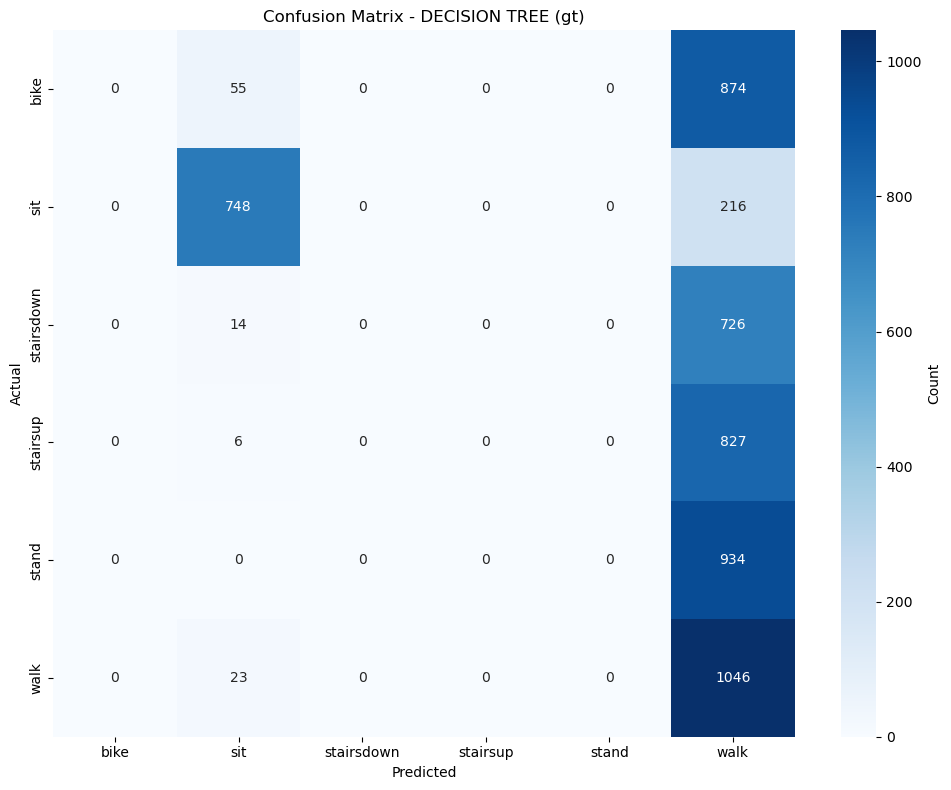


To try different configurations, modify the variables at the top:
  - FEATURES: Change the list of features to use
  - TARGET: Change the target variable (e.g., 'gt' for multi-class)
  - MODEL_TYPE: Change the model (e.g., 'random_forest', 'knn', etc.)


In [24]:
# ============================================================================
# FLEXIBLE CLASSIFICATION FRAMEWORK
# ============================================================================
# This framework allows you to:
# 1. Select different features (X) from numeric columns
# 2. Select different target variables (y) - supports binary and multi-class
# 3. Try different classification models
# ============================================================================

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ============================================================================
# CONFIGURATION: Change these variables to experiment
# ============================================================================

# Select features (X) - choose from numeric columns: ['x', 'y', 'z', 'mod']
FEATURES = ["x", "y", "z", "mod"]  # Change this list to try different features

# Select target (y) - choose from categorical columns: ['activity_type', 'gt']
TARGET = (
    "gt"  # Change to 'gt' for multi-class classification, or 'activity_type' for binary
)

# Select model - options: 'logistic', 'random_forest', 'decision_tree', 'knn'
MODEL_TYPE = "decision_tree"  # Change this to try different models

# ============================================================================
# DATA PREPARATION
# ============================================================================

# Get numeric columns for features
numeric_cols = df_subset_ph_acc.select_dtypes(include=[np.number]).columns.tolist()
print("Available numeric columns for features:", numeric_cols)

# Get categorical columns for target
categorical_cols = df_subset_ph_acc.select_dtypes(include=["object"]).columns.tolist()
print("Available categorical columns for target:", categorical_cols)
print("\n" + "=" * 70)

# Validate feature selection
invalid_features = [f for f in FEATURES if f not in numeric_cols]
if invalid_features:
    raise ValueError(
        f"Invalid features selected: {invalid_features}. Available: {numeric_cols}"
    )

# Validate target selection
if TARGET not in categorical_cols:
    raise ValueError(
        f"Invalid target selected: {TARGET}. Available: {categorical_cols}"
    )

# Prepare the data
X = StandardScaler().fit_transform(df_subset_ph_acc.loc[::100, FEATURES].values)
y = df_subset_ph_acc.loc[::100, TARGET].values

# Check for missing values
print("\nData Summary:")
print(f"  Features (X): {FEATURES}")
print(f"  Target (y): {TARGET}")
print(f"  Shape of X: {X.shape}")
print(f"  Shape of y: {y.shape}")
print(f"  Missing values in X: {np.isnan(X).sum()}")

# Show target distribution
print(f"\nTarget distribution ({TARGET}):")
target_counts = np.unique(y, return_counts=True)
print(target_counts)
print(f"\nNumber of classes: {len(target_counts[0])}")
print("=" * 70 + "\n")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================================================================
# MODEL SELECTION AND TRAINING
# ============================================================================

models = {
    "logistic": LogisticRegression(random_state=42, max_iter=1000),
    "random_forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "decision_tree": DecisionTreeClassifier(random_state=42, max_leaf_nodes=2),
    "knn": KNeighborsClassifier(n_neighbors=5),
    "svm": SVC(random_state=42),
}

if MODEL_TYPE not in models:
    raise ValueError(
        f"Invalid model type: {MODEL_TYPE}. Available: {list(models.keys())}"
    )

print(f"Training {MODEL_TYPE.upper().replace('_', ' ')} classifier...")
classifier = models[MODEL_TYPE]
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Make predictions
start_time = time.time()
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.2f} seconds")

# ============================================================================
# MODEL EVALUATION
# ============================================================================

print("\n" + "=" * 70)
print("MODEL PERFORMANCE")
print("=" * 70)
print(f"\nModel: {MODEL_TYPE.upper().replace('_', ' ')}")
print(f"Features: {FEATURES}")
print(f"Target: {TARGET}")
print(f"\nTraining Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Get class names for reporting
class_names = sorted(df_subset_ph_acc[TARGET].unique())

print("\n" + "-" * 70)
print("Classification Report:")
print("-" * 70)
print(classification_report(y_test, y_pred, target_names=class_names))

print("\n" + "-" * 70)
print("Confusion Matrix:")
print("-" * 70)
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix in a readable format
print(f"\n{'Predicted':>20}", end="")
for name in class_names:
    print(f"{name:>15}", end="")
print()
for i, name in enumerate(class_names):
    print(f"{'Actual ' + name:>20}", end="")
    for j in range(len(class_names)):
        print(f"{cm[i, j]:>15}", end="")
    print()

# ============================================================================
# FEATURE IMPORTANCE / COEFFICIENTS
# ============================================================================

print("\n" + "-" * 70)
if hasattr(classifier, "coef_"):
    print("Feature Coefficients (Logistic Regression):")
    print("-" * 70)
    for i, feature in enumerate(FEATURES):
        if len(classifier.coef_) == 1:  # Binary classification
            print(f"{feature:>15}: {classifier.coef_[0][i]:.4f}")
        else:  # Multi-class
            for j, class_name in enumerate(class_names):
                print(
                    f"{feature:>15} (class {class_name}): {classifier.coef_[j][i]:.4f}"
                )
    if hasattr(classifier, "intercept_"):
        if len(classifier.intercept_) == 1:
            print(f"{'Intercept':>15}: {classifier.intercept_[0]:.4f}")
        else:
            for j, class_name in enumerate(class_names):
                print(
                    f"{'Intercept (' + class_name + ')':>15}: {classifier.intercept_[j]:.4f}"
                )

elif hasattr(classifier, "feature_importances_"):
    print("Feature Importances (Tree-based models):")
    print("-" * 70)
    for i, feature in enumerate(FEATURES):
        print(f"{feature:>15}: {classifier.feature_importances_[i]:.4f}")

# ============================================================================
# VISUALIZATION
# ============================================================================

# Confusion Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar_kws={"label": "Count"},
)
plt.title(f"Confusion Matrix - {MODEL_TYPE.upper().replace('_', ' ')} ({TARGET})")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("To try different configurations, modify the variables at the top:")
print("  - FEATURES: Change the list of features to use")
print("  - TARGET: Change the target variable (e.g., 'gt' for multi-class)")
print("  - MODEL_TYPE: Change the model (e.g., 'random_forest', 'knn', etc.)")
print("=" * 70)